### Airbnb NYC Data Analysis

### Importing Packages

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Importing Dataset

In [187]:
df = pd.read_csv('AB_NYC_2019.csv')

In [188]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Descriptive Statistics & Information

#### Checking for datatypes and number of records per columns

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [190]:
df.shape

(48895, 16)

In [191]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Data Cleaning & Preparation

### Checking for Null Values

In [192]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

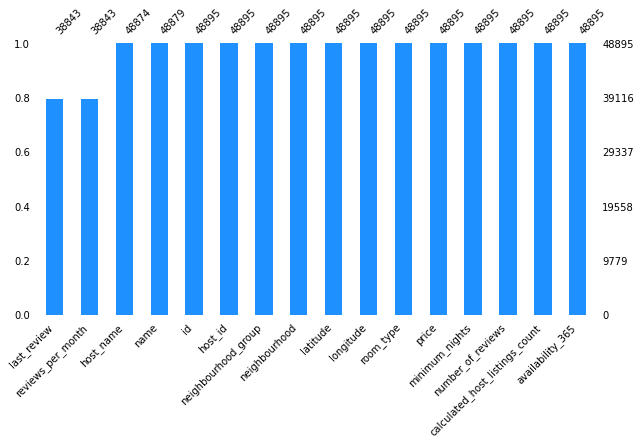

In [193]:
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=10)

#### According to the above graph, we can clearly observe that there are 4 columns namely, last review, reviews per month, host_name and name; these missing values need to be imputed or dealt with for avoiding skewness in the data.

In [194]:
#sns.heatmap(df.isnull(),cbar=True, cmap='viridis')
#msno.heatmap(df, figsize=(10,5))

### Dropping Unnecessary Records

In [196]:
df.dropna(subset = ['name'], inplace=True)
df.dropna(subset = ['host_name'], inplace=True)

### Changing datatype for date column

In [197]:
df['last_review'] = df['last_review'].astype(str).astype('datetime64[ns]')

### Checking imputed values 

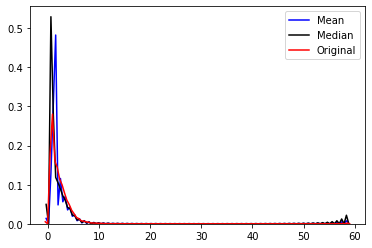

In [198]:
reviews_per_month_mean = df.reviews_per_month.mean()
reviews_per_month_median = df.reviews_per_month.median()
df['reviews_per_month_mean'] = df.reviews_per_month.fillna(reviews_per_month_mean)
df['reviews_per_month_median'] = df.reviews_per_month.fillna(reviews_per_month_median)

sns.kdeplot(df['reviews_per_month_mean'],color='blue',label='Mean')
sns.kdeplot(df['reviews_per_month_median'],color='black',label='Median')
sns.kdeplot(df['reviews_per_month'],color='red',label='Original')
plt.legend()

#### To handle missing values, drop NA function has been used to delete the numbe of records that have missing data; also, it is neccessary to convert the data type for date variables using the astype() function.

#### The above graph specifies which central tendency propetty would be a closer fit to impute data for the reviews_per_month column. According to this, mean would be a good fit for the imputation with the less difference in the numbers.

### Imputing N/A values with central tendency; replacing with mean values

In [199]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [200]:
df['last_review'] = df['last_review'].fillna(df['last_review'].mean())

In [201]:
df['last_review'] = pd.to_datetime(df['last_review']).dt.date

#### The above functions are used to fill the NA values with mean so that the data can be used for further analysis

### Correlation Plot to understand relation between variables

In [202]:
corr = df.corr()
corr.style.background_gradient(cmap='Purples').set_precision(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_mean,reviews_per_month_median
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.25,0.13,0.09,0.25,0.22
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.25,0.15,0.20,0.25,0.24
latitude,-0.00,0.02,1.00,0.08,0.03,0.03,-0.02,-0.01,0.02,-0.01,-0.01,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.13,-0.11,0.08,0.13,0.14
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.02,0.06,0.08,-0.02,-0.04
minimum_nights,-0.01,-0.02,0.03,-0.06,0.04,1.00,-0.08,-0.09,0.13,0.15,-0.09,-0.11
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.53,-0.07,0.17,0.53,0.57
reviews_per_month,0.25,0.25,-0.01,0.13,-0.02,-0.09,0.53,1.00,-0.01,0.16,1.00,0.98
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.01,1.00,0.23,-0.01,-0.03
availability_365,0.09,0.20,-0.01,0.08,0.08,0.15,0.17,0.16,0.23,1.00,0.16,0.17


#### The above graph shows the correlation between different numerical values to understand the realtion for predictive modelling

### Exporting data into csv

In [203]:
df.to_csv('samplenycairbnb.csv', index=False)

### Predictive Modelling

### One Hot Encoding

In [218]:
X_features_encode = pd.get_dummies(df, columns = {'neighbourhood_group','neighbourhood','room_type'})

In [219]:
X_features = X_features_encode.drop(['availability_365','name','host_name','last_review','latitude','longitude','reviews_per_month_mean','reviews_per_month_median'], axis = 1, inplace = False)

In [221]:
X_features.columns

Index(['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room',
       ...
       'neighbourhood_Westerleigh', 'neighbourhood_Whitestone',
       'neighbourhood_Williamsbridge', 'neighbourhood_Williamsburg',
       'neighbourhood_Willowbrook', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodrow', 'neighbourhood_Woodside'],
      dtype='object', length=236)

#### One hot encoding is done using get.dummies function to chnage categorical values into binary values which can be used for prediction modelling 

In [222]:
y = X_features_encode['availability_365']

### Checking if the data is normally distributed

<AxesSubplot:>

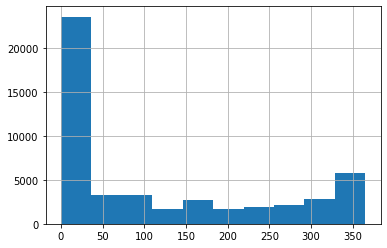

In [223]:
y.hist()

In [224]:
y_log = np.log1p(y)

<AxesSubplot:>

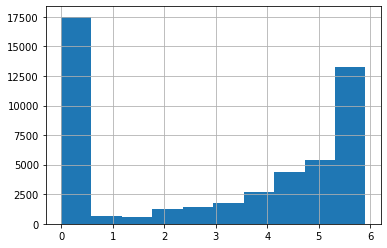

In [225]:
y_log.hist()

#### Normally distributing the data using log function

### Splitting the data into train and test data

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=0)

### Linear Regression

In [227]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr_score = regr.score(X_test, y_test)
regr_score

0.17996828634682827

In [228]:
y_pred = regr.predict(X_test)

In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.64848190778869
Mean Squared Error: 14183.086336867567
Root Mean Squared Error: 119.09276357893273


### Random Forest Regressor

In [233]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
reg_score = model.score(X_test, y_test)
reg_score

0.41150362871459856

In [234]:
y_pred = model.predict(X_test)

In [235]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.0854400437109
Mean Squared Error: 10178.502494361228
Root Mean Squared Error: 100.8885647353615


#### Future Scope would be to create scale the data and use feature selection/importance to get more accurate results and predict approximate values 